In [53]:
# Basic Imports
import sys
sys.path.insert(1, "../")

import utils
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

# Imports for data preprocessing.
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Tensorflow imports
import tensorflow as tf

In [54]:
# Disable GPU
# tf.config.set_visible_devices([], 'GPU')

In [55]:
# Constants
DATA_FILE_NAME = '../Data/final_crypto_data.csv'
SELECTED_MONTHS = [2,3,4]
SELECTED_FEATURES = [
        'reddit_compound_polarity',
		# 'quote_volume_24h',
        # 'volume_change_24h',
        # 'percent_change_1h',
        # 'percent_change_24h',
        # 'percent_change_7d',
		# 'high_24h',
        # 'last_24h',
        # 'bid_24h',
        # 'vwap_24h',
        # 'volume_24h',
        # 'low_24h',
        # 'ask_24h',
        # 'open_24h',
        'volume_1min',
        'high_1min',
        'low_1min',
        'open_1min',
        'close_1min'
    ]

In [56]:
df = pd.read_csv(DATA_FILE_NAME)
df

,Unnamed: 0,_id,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,...,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
0,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.0,62561.13,...,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
1,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,1635527309,62571.40,60907.24,5111.938615,56425.0,62580.05,...,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
2,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,1635527428,62582.19,60908.89,5115.569587,56425.0,62596.03,...,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
3,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,1635527672,62572.06,60909.91,5117.061581,56425.0,62590.43,...,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
4,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,1635527551,62587.09,60909.54,5117.193435,56425.0,62606.26,...,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246786,246786,62712800bbd592fa2c82e9ab,38786.95,38327.07,1651352348,38304.93,38539.95,566.041421,38160.4,38326.82,...,-0.363037,-0.606400,-3.693057,-16.314320,-12.909292,1.689268,7.293839e+11,42.0516,8.050246e+11,0.000800
246787,246787,62712800bbd592fa2c82e9ac,38786.95,38332.23,1651352290,38314.66,38539.96,566.041421,38160.4,38335.17,...,-0.344114,-0.592877,-3.713096,-16.308426,-12.839252,1.692403,7.293371e+11,42.0489,8.049729e+11,0.000800
246788,246788,62712800bbd592fa2c82e9ad,38786.95,38329.94,1651352410,38317.93,38539.93,566.041421,38160.4,38330.19,...,-0.345789,-0.598362,-3.683293,-16.296175,-12.917047,1.698228,7.294364e+11,42.0546,8.050826e+11,0.000800
246789,246789,62712800bbd592fa2c82e9ae,38786.95,38344.79,1651352469,38321.67,38539.90,566.041421,38160.4,38344.79,...,-0.354289,-0.602308,-3.686438,-16.303936,-12.928782,1.698071,7.293828e+11,42.0515,8.050234e+11,0.000800


In [57]:
# Drop unnecessary columns
df = utils.setDateTimeAsIndex(df)
df = utils.filterColumns(df, SELECTED_FEATURES)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,reddit_compound_polarity,volume_1min,high_1min,low_1min,open_1min,close_1min
datetime,,,,,,
2022-02-01 00:01:02,-0.161353,0.207117,38435.71,38419.73,38435.71,38421.89
2022-02-01 00:02:04,-0.161353,0.631940,38374.98,38349.80,38352.40,38374.98
2022-02-01 00:03:04,-0.227089,0.000000,38359.10,38359.10,38359.10,38359.10
2022-02-01 00:04:02,-0.227089,0.000000,38441.71,38441.71,38441.71,38441.71
2022-02-01 00:05:03,-0.227089,0.004840,38471.80,38471.80,38471.80,38471.80
...,...,...,...,...,...,...
2022-04-30 20:59:08,0.000800,0.000650,38327.07,38327.07,38327.07,38327.07
2022-04-30 20:58:10,0.000800,0.000000,38332.23,38332.23,38332.23,38332.23
2022-04-30 21:00:10,0.000800,0.007191,38317.93,38317.93,38317.93,38317.93


In [58]:
# check for null values per column
print("NaN values per column count: \n")
df.isna().sum()

NaN values per column count: 



reddit_compound_polarity    0
volume_1min                 0
high_1min                   0
low_1min                    0
open_1min                   0
close_1min                  0
dtype: int64

In [59]:
values = df.values
i = 1

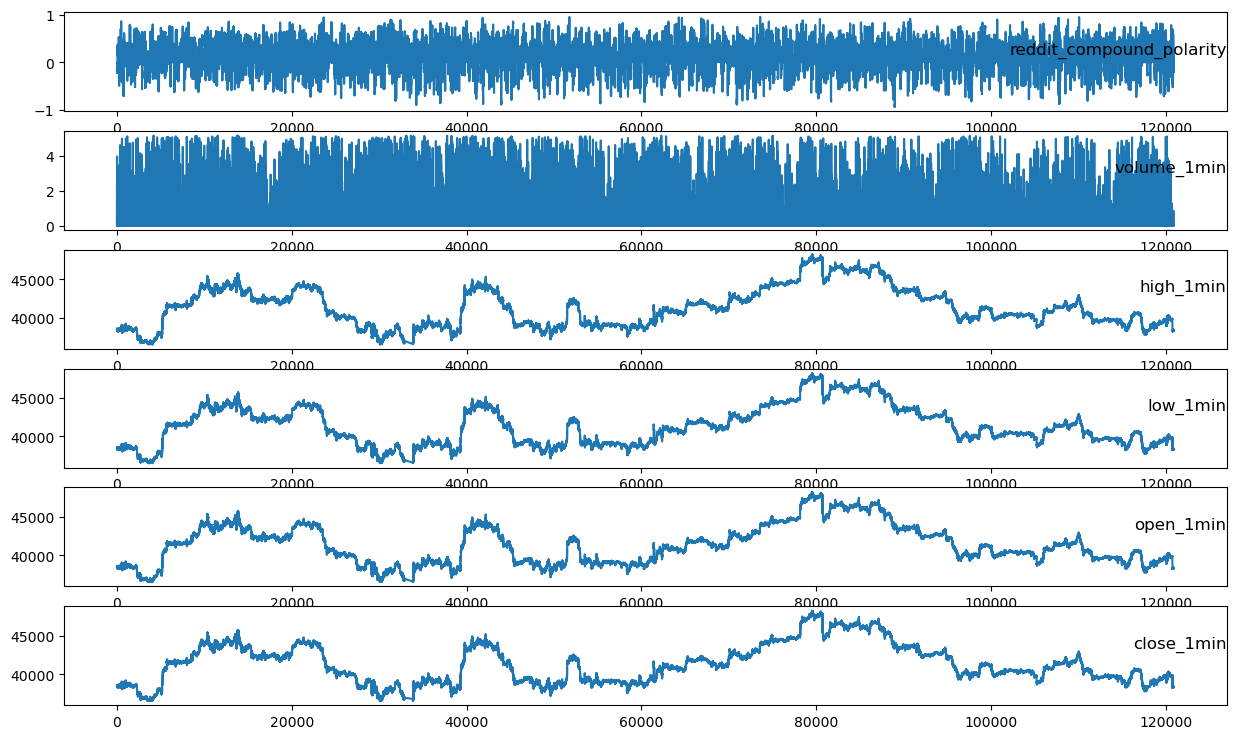

In [60]:
# plot each column
plt.figure(figsize=(15,9))
for group in range(len(SELECTED_FEATURES)) :
	plt.subplot(len(SELECTED_FEATURES), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

# LSTM Data Preparation

In [61]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, doPrints=False):
	"""
	:param data: Ta data pou theloume na metasximatisoume se numpy Array
	:param n_in: to plithos ton Lags pou tha exei i input series (X)
	:param n_out: to plithos ton Lags pou tha exei i output series (y)
	:param dropnan: ama theloume na kanoume drop ta nan valuws
	:return: epistrefei tin metasximatismeni lista se multivariate time series.
	"""

	# vreiskei to n_vars
	# an ta data einai list = 1
	# alliws pernei to shape ton data.
	n_vars = 1 if type(data) is list else data.shape[1]

	# kanoume ta data DataFrame
	mDf = pd.DataFrame(data)
	if doPrints:
		print(mDf)

	# ftiaxnei 2 adies listes. mia fia ta
	cols, names = list(), list()
	if doPrints:
		print(n_vars)

	# ftiaxnoume to input series X. (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		# kanoume append sto cols to dataframe olistimeno kata i rows
		cols.append(mDf.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# ftiaxnoume to forecast sequence y (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(mDf.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	if doPrints:
		print(cols)
		print(names)

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [62]:
# get dataframe values.
values = df.values
values

array([[-1.61352632e-01,  2.07116610e-01,  3.84357100e+04,
         3.84197300e+04,  3.84357100e+04,  3.84218900e+04],
       [-1.61352632e-01,  6.31939750e-01,  3.83749800e+04,
         3.83498000e+04,  3.83524000e+04,  3.83749800e+04],
       [-2.27088889e-01,  0.00000000e+00,  3.83591000e+04,
         3.83591000e+04,  3.83591000e+04,  3.83591000e+04],
       ...,
       [ 8.00273973e-04,  7.19140000e-03,  3.83179300e+04,
         3.83179300e+04,  3.83179300e+04,  3.83179300e+04],
       [ 8.00273973e-04,  0.00000000e+00,  3.83447900e+04,
         3.83447900e+04,  3.83447900e+04,  3.83447900e+04],
       [ 8.00273973e-04,  1.85617000e-01,  3.83395400e+04,
         3.83395400e+04,  3.83395400e+04,  3.83395400e+04]])

# Normalize Dataframe Values.

In [63]:
# Ensure all data are float.
values = values.astype('float32')
values

array([[-1.6135263e-01,  2.0711660e-01,  3.8435711e+04,  3.8419730e+04,
         3.8435711e+04,  3.8421891e+04],
       [-1.6135263e-01,  6.3193977e-01,  3.8374980e+04,  3.8349801e+04,
         3.8352398e+04,  3.8374980e+04],
       [-2.2708888e-01,  0.0000000e+00,  3.8359102e+04,  3.8359102e+04,
         3.8359102e+04,  3.8359102e+04],
       ...,
       [ 8.0027396e-04,  7.1914000e-03,  3.8317930e+04,  3.8317930e+04,
         3.8317930e+04,  3.8317930e+04],
       [ 8.0027396e-04,  0.0000000e+00,  3.8344789e+04,  3.8344789e+04,
         3.8344789e+04,  3.8344789e+04],
       [ 8.0027396e-04,  1.8561700e-01,  3.8339539e+04,  3.8339539e+04,
         3.8339539e+04,  3.8339539e+04]], dtype=float32)

In [64]:
# Normalize Continues Features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
scaled_values

array([[0.41117644, 0.04029166, 0.15970731, 0.16040444, 0.16055155,
        0.15935087],
       [0.41117644, 0.1229351 , 0.15449071, 0.15438509, 0.15338922,
        0.1553185 ],
       [0.37641957, 0.        , 0.15312672, 0.1551857 , 0.15396547,
        0.15395331],
       ...,
       [0.49691182, 0.00139899, 0.14959025, 0.1516416 , 0.15042591,
        0.15041399],
       [0.49691182, 0.        , 0.15189719, 0.15395355, 0.152735  ,
        0.15272307],
       [0.49691182, 0.03610921, 0.15144634, 0.15350175, 0.15228367,
        0.15227175]], dtype=float32)

In [65]:
# specify the number of lag hours
n_hours = 10
n_features = len(SELECTED_FEATURES)
n_obs = n_hours * n_features

In [66]:
# prepare data for lstm
reframed = series_to_supervised(scaled_values, n_in=n_hours,n_out=1)
reframed

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
10,0.411176,0.040292,0.159707,0.160404,0.160552,0.159351,0.411176,0.122935,0.154491,0.154385,...,0.173389,0.173968,0.172724,0.174231,0.376420,0.013580,0.164980,0.167064,0.165829,0.165816
11,0.411176,0.122935,0.154491,0.154385,0.153389,0.155318,0.376420,0.000000,0.153127,0.155186,...,0.164980,0.167064,0.165829,0.165816,0.376420,0.206870,0.173842,0.175593,0.174347,0.174685
12,0.376420,0.000000,0.153127,0.155186,0.153965,0.153953,0.376420,0.000000,0.160223,0.162297,...,0.173842,0.175593,0.174347,0.174685,0.376420,0.042701,0.154113,0.155800,0.154579,0.154940
13,0.376420,0.000000,0.160223,0.162297,0.161067,0.161055,0.376420,0.000942,0.162807,0.164886,...,0.154113,0.155800,0.154579,0.154940,0.376420,0.013640,0.172319,0.172564,0.171628,0.173160
14,0.376420,0.000942,0.162807,0.164886,0.163654,0.163641,0.376420,0.000852,0.166264,0.168350,...,0.172319,0.172564,0.171628,0.173160,0.376420,0.000000,0.156842,0.158909,0.157684,0.157672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120919,0.496911,0.000130,0.152788,0.154846,0.153627,0.153615,0.518552,0.000000,0.151383,0.153438,...,0.150155,0.152207,0.150991,0.150979,0.496912,0.000126,0.150375,0.152428,0.151212,0.151200
120920,0.518552,0.000000,0.151383,0.153438,0.152220,0.152208,0.496912,0.000000,0.152427,0.154485,...,0.150375,0.152428,0.151212,0.151200,0.496912,0.000000,0.150819,0.152873,0.151655,0.151644
120921,0.496912,0.000000,0.152427,0.154485,0.153266,0.153254,0.496912,0.000387,0.152842,0.154900,...,0.150819,0.152873,0.151655,0.151644,0.496912,0.001399,0.149590,0.151642,0.150426,0.150414
120922,0.496912,0.000387,0.152842,0.154900,0.153680,0.153668,0.496912,0.000973,0.148395,0.150444,...,0.149590,0.151642,0.150426,0.150414,0.496912,0.000000,0.151897,0.153954,0.152735,0.152723


# Define And Fit Model

In [67]:
def train_test_valid_split(total_x, total_y, train_size=0.8, valid_size=0.1) :
    train_index = int(len(total_x) * train_size)
    valid_index = int(len(total_x) * valid_size)

    X_train, y_train = total_x[0 :train_index], total_y[0 :train_index]
    X_valid, y_valid = total_x[train_index :train_index + valid_index], total_y[train_index :train_index + valid_index]
    X_test, y_test = total_x[train_index + valid_index :], total_y[train_index + valid_index :]

    print("-------- train test valid split --------")
    print(len(X_train)), print(len(y_train))
    print(len(X_valid)), print(len(y_valid))
    print(len(X_test)), print(len(y_test))
    print("----------------------------------------")

    return np.array(X_train), \
           np.array(y_train), \
           np.array(X_valid), \
           np.array(y_valid), \
           np.array(X_test), \
           np.array(y_test)

In [68]:
# split into train and test sets
values = reframed.values
# cutoff = round(0.70 * len(values))
# values = values[cutoff:,:]
values

array([[4.1117644e-01, 4.0291656e-02, 1.5970731e-01, ..., 1.6706443e-01,
        1.6582942e-01, 1.6581631e-01],
       [4.1117644e-01, 1.2293510e-01, 1.5449071e-01, ..., 1.7559290e-01,
        1.7434716e-01, 1.7468452e-01],
       [3.7641957e-01, 0.0000000e+00, 1.5312672e-01, ..., 1.5579987e-01,
        1.5457892e-01, 1.5493989e-01],
       ...,
       [4.9691182e-01, 0.0000000e+00, 1.5242743e-01, ..., 1.5164161e-01,
        1.5042591e-01, 1.5041399e-01],
       [4.9691182e-01, 3.8712684e-04, 1.5284157e-01, ..., 1.5395355e-01,
        1.5273499e-01, 1.5272307e-01],
       [4.9691182e-01, 9.7301701e-04, 1.4839458e-01, ..., 1.5350175e-01,
        1.5228367e-01, 1.5227175e-01]], dtype=float32)

In [69]:
X =  values[:,:n_obs]
X

array([[4.1117644e-01, 4.0291656e-02, 1.5970731e-01, ..., 1.7396784e-01,
        1.7272425e-01, 1.7423105e-01],
       [4.1117644e-01, 1.2293510e-01, 1.5449071e-01, ..., 1.6706443e-01,
        1.6582942e-01, 1.6581631e-01],
       [3.7641957e-01, 0.0000000e+00, 1.5312672e-01, ..., 1.7559290e-01,
        1.7434716e-01, 1.7468452e-01],
       ...,
       [4.9691182e-01, 0.0000000e+00, 1.5242743e-01, ..., 1.5287256e-01,
        1.5165544e-01, 1.5164351e-01],
       [4.9691182e-01, 3.8712684e-04, 1.5284157e-01, ..., 1.5164161e-01,
        1.5042591e-01, 1.5041399e-01],
       [4.9691182e-01, 9.7301701e-04, 1.4839458e-01, ..., 1.5395355e-01,
        1.5273499e-01, 1.5272307e-01]], dtype=float32)

In [70]:
y = values[:,-1]
y

array([0.1658163 , 0.17468452, 0.15493989, ..., 0.15041399, 0.15272307,
       0.15227175], dtype=float32)

In [71]:
train_X, train_y, valid_X, valid_y, test_X, test_y = train_test_valid_split(
	X,
	y,
	train_size=0.8,
	valid_size=0.1
)
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
96731
96731
12091
12091
12092
12092
----------------------------------------
----------------------------
-------- Train X: (96731, 60), Train y: (96731,) --------
-------- Valid X: (12091, 60), Valid y: (12091,) --------
-------- Test X: (12092, 60), Test y: (12092,) --------
----------------------------



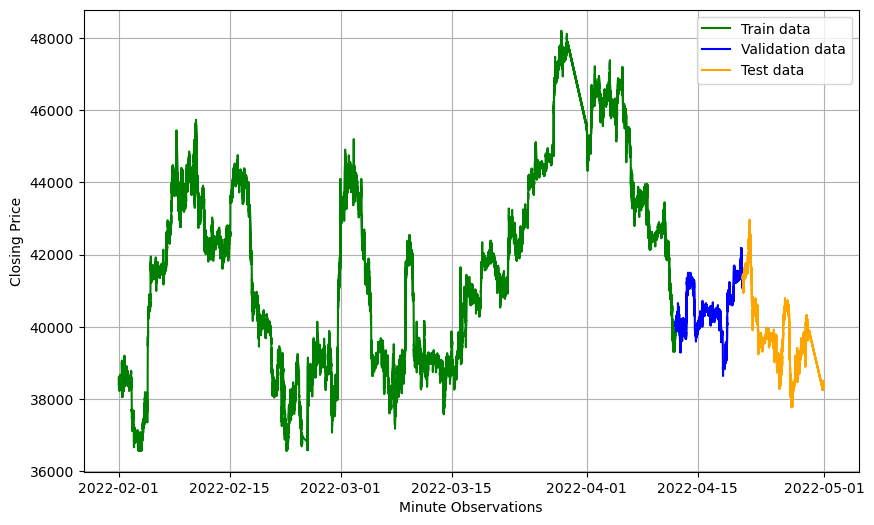

In [72]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df['close_1min'][:len(train_y)], 'green', label='Train data')
plt.plot(df['close_1min'][len(train_y):len(train_y)+len(valid_y)], 'blue', label='Validation data')
plt.plot(df['close_1min'][len(train_y)+len(valid_y):], 'orange', label='Test data')
plt.legend()

In [73]:
train_X

array([[0.41117644, 0.04029166, 0.15970731, ..., 0.17396784, 0.17272425,
        0.17423105],
       [0.41117644, 0.1229351 , 0.15449071, ..., 0.16706443, 0.16582942,
        0.1658163 ],
       [0.37641957, 0.        , 0.15312672, ..., 0.1755929 , 0.17434716,
        0.17468452],
       ...,
       [0.76781154, 0.41324586, 0.30322385, ..., 0.29631257, 0.2949164 ,
        0.29489326],
       [0.76781154, 0.1032942 , 0.30275702, ..., 0.30089116, 0.29948926,
        0.2994659 ],
       [0.76781154, 0.08975352, 0.2998867 , ..., 0.2961266 , 0.29473066,
        0.29470754]], dtype=float32)

In [74]:
valid_X

array([[0.74197125, 0.06469937, 0.29875445, ..., 0.29846025, 0.29706144,
        0.29703808],
       [0.76781154, 0.        , 0.29755545, ..., 0.29822016, 0.2968216 ,
        0.2975378 ],
       [0.76781154, 0.02607615, 0.3007276 , ..., 0.29702806, 0.29563117,
        0.2956078 ],
       ...,
       [0.7844757 , 0.        , 0.40845323, ..., 0.4126866 , 0.4111452 ,
        0.41111302],
       [0.7844757 , 0.        , 0.40998936, ..., 0.41685796, 0.41531134,
        0.4155643 ],
       [0.7844757 , 0.        , 0.40344644, ..., 0.416389  , 0.41484284,
        0.41481042]], dtype=float32)

In [75]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
valid_X = valid_X.reshape((valid_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

(96731, 10, 6) (96731,) (12091, 10, 6) (12091,)


In [76]:
 # Network Configurations
EPOCHS = 100
BATCH_SIZE = 1024

In [77]:
# design network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(
	100,
	return_sequences=True,
	# activation='relu',
	# unroll=True,
	input_shape=(train_X.shape[1], train_X.shape[2]),
))
# model.add(Dropout(0.2))
model.add(tf.keras.layers.LSTM(
	50,
	# activation='relu',
	# unroll=True,
))
# model.add(Dropout(0.2))
# model.add(Dense(BATCH_SIZE))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')

In [78]:
# fit network
history = model.fit(
	train_X,
	train_y,
	epochs=EPOCHS,
	batch_size=BATCH_SIZE,
	validation_data=(valid_X, valid_y),
	verbose=2,
	shuffle=False
)

Epoch 1/100


2022-12-22 18:36:48.431899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-22 18:36:48.632999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-22 18:36:49.009205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-22 18:36:49.173141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-22 18:36:49.434240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-22 18:36:52.339702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-22 18:36:52.413367: I tensorflow/core/grappler/optimizers/cust

95/95 - 5s - loss: 0.0313 - val_loss: 0.0101 - 5s/epoch - 56ms/step
Epoch 2/100
95/95 - 2s - loss: 0.0141 - val_loss: 0.0035 - 2s/epoch - 23ms/step
Epoch 3/100
95/95 - 2s - loss: 0.0065 - val_loss: 0.0025 - 2s/epoch - 22ms/step
Epoch 4/100
95/95 - 2s - loss: 0.0051 - val_loss: 0.0021 - 2s/epoch - 21ms/step
Epoch 5/100
95/95 - 2s - loss: 0.0045 - val_loss: 0.0025 - 2s/epoch - 22ms/step
Epoch 6/100
95/95 - 2s - loss: 0.0040 - val_loss: 0.0030 - 2s/epoch - 22ms/step
Epoch 7/100
95/95 - 2s - loss: 0.0035 - val_loss: 0.0029 - 2s/epoch - 21ms/step
Epoch 8/100
95/95 - 2s - loss: 0.0031 - val_loss: 0.0026 - 2s/epoch - 22ms/step
Epoch 9/100
95/95 - 2s - loss: 0.0028 - val_loss: 0.0023 - 2s/epoch - 21ms/step
Epoch 10/100
95/95 - 2s - loss: 0.0026 - val_loss: 0.0020 - 2s/epoch - 21ms/step
Epoch 11/100
95/95 - 2s - loss: 0.0024 - val_loss: 0.0017 - 2s/epoch - 20ms/step
Epoch 12/100
95/95 - 2s - loss: 0.0023 - val_loss: 0.0013 - 2s/epoch - 21ms/step
Epoch 13/100
95/95 - 2s - loss: 0.0021 - val_loss

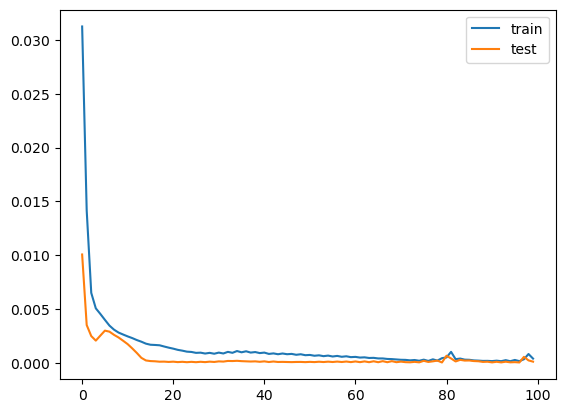

In [79]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [80]:
# make a prediction
yhat = model.predict(valid_X)
valid_X = valid_X.reshape((valid_X.shape[0], n_hours*n_features))
valid_X

  1/378 [..............................] - ETA: 2:37

2022-12-22 18:40:11.406953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-22 18:40:11.473918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-22 18:40:11.528794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


378/378 [==============================] - 2s 5ms/step


array([[0.74197125, 0.06469937, 0.29875445, ..., 0.29846025, 0.29706144,
        0.29703808],
       [0.76781154, 0.        , 0.29755545, ..., 0.29822016, 0.2968216 ,
        0.2975378 ],
       [0.76781154, 0.02607615, 0.3007276 , ..., 0.29702806, 0.29563117,
        0.2956078 ],
       ...,
       [0.7844757 , 0.        , 0.40845323, ..., 0.4126866 , 0.4111452 ,
        0.41111302],
       [0.7844757 , 0.        , 0.40998936, ..., 0.41685796, 0.41531134,
        0.4155643 ],
       [0.7844757 , 0.        , 0.40344644, ..., 0.416389  , 0.41484284,
        0.41481042]], dtype=float32)

In [81]:
# invert scaling for forecast
inv_yhat = np.concatenate((valid_X[:, -(n_features-1):], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

In [82]:
# invert scaling for actual
valid_y_new = valid_y.reshape((len(valid_y), 1))
inv_y = np.concatenate((valid_X[:, -(n_features-1):], valid_y_new), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [83]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 117.320


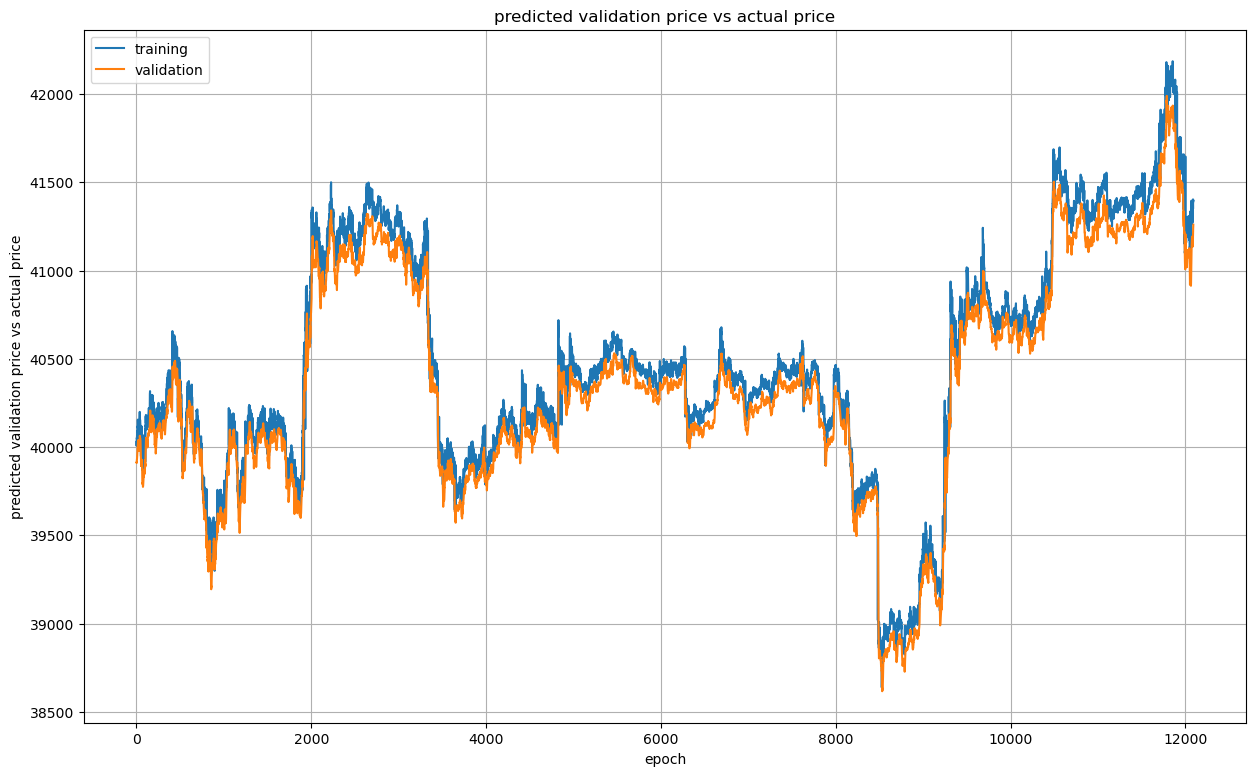

In [84]:
utils.display_training_curves(inv_y, inv_yhat, 'predicted validation price vs actual price')

# Predict test values

In [85]:
test_yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
test_X

378/378 [==============================] - 2s 5ms/step


array([[7.8447568e-01, 0.0000000e+00, 4.0800834e-01, ..., 4.1638684e-01,
        4.1521764e-01, 4.1480851e-01],
       [8.8956553e-01, 9.7268051e-04, 4.0823865e-01, ..., 4.1452503e-01,
        4.1333485e-01, 4.1294909e-01],
       [9.7165990e-01, 8.6160041e-03, 4.0901375e-01, ..., 4.1479874e-01,
        4.1325474e-01, 4.1322255e-01],
       ...,
       [4.9691182e-01, 0.0000000e+00, 1.5242743e-01, ..., 1.5287256e-01,
        1.5165544e-01, 1.5164351e-01],
       [4.9691182e-01, 3.8712684e-04, 1.5284157e-01, ..., 1.5164161e-01,
        1.5042591e-01, 1.5041399e-01],
       [4.9691182e-01, 9.7301701e-04, 1.4839458e-01, ..., 1.5395355e-01,
        1.5273499e-01, 1.5272307e-01]], dtype=float32)

In [86]:
# invert scaling for forecast
test_inv_yhat = np.concatenate((test_X[:, -(n_features-1):], test_yhat), axis=1)
test_inv_yhat = scaler.inverse_transform(test_inv_yhat)
test_inv_yhat = test_inv_yhat[:,-1]

In [87]:
# invert scaling for actual
valid_y.reshape((len(valid_y), 1))
test_y_new = test_y.reshape((len(test_y), 1))
test_inv_y = np.concatenate((test_X[:, -(n_features-1):], test_y), axis=1)
test_inv_y = scaler.inverse_transform(test_inv_y)
test_inv_y = test_inv_y[:,-1]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_inv_y, test_inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
utils.display_training_curves(test_inv_y, test_inv_yhat, 'predicted test prices vs actual price')